# Identify Fraud from Enron Email and Financial Data
### By Jiemin Wang

## Question 1
### Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]

The goal of this project is to build a predictive model which helps to identify person of interest (POI) in Enron Fraud case. Machine learning is useful in trying to accomplish the goal since it provides computers with the ability to learn information such as categories which can then be applied to new dataset.

The dataset contains 146 data points and 21 features. Of the 146 data points, 18 are labeled as POI and 128 are labeled as non-POI. Missing values (NaN) exist in all features except **POI**. We replace missing values with zeros for all features of numeric types and drop feature **email_address** since it contains text string of email addresses.

After reading the file "enron61702insiderpay.pdf", we found that **TOTAL** and **THE TRAVEL AGENCY IN THE PARK** are potentially outliers of the dataset. With scatter plot of bonus and salary, we confirmed that **TOTAL** is an outlier. From the name **THE TRAVEL AGENCY IN THE PARK**, we considered it as an outlier as well. In addition, **LOCKHART EUGENE E** has missing values of all features. We removed the above three rows from the dataset. 

## Question 2
### What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “properly scale features”, “intelligently select feature”]

** Feature Selection **

The feature selection was done automatecally by using GridSearchCV together with Pipeline. We used pipeline to chain the steps in classification: feature scaling, feature selection and classificaiton. We didn't manually select features since it requires expertise knowledge about the procedures otherwise the selected features can be biased. Therefore, we relied on the resutls from automated feature selection function. 

For each step in pipeline, we considered:

1. Feature scaling: w/o scaling, MinMaxScaler, StandardScaler.
2. Feature selection: SelectKBest, PCA.
3. Classification: LogisticRegression, DecisionTreeClassifier, SVC, GaussianNB, AdaBoostClassifier, RandomForestClassifier

The following procedure is based on the results from GridSearchCV and the test_classifier of test.py. We used StratifiedShuffleSplit cross validation due to the small size of our dataset.

The procedure we followed:

1. Choose the classifier based on the performace we got.
    To simplify the procedure and reduce the combinations of parameters, we first used MinMaxScaler and SelectKBest as the first and the second steps in our pipeline. Then, we tuned the number of features of SelectKBest and the parameters of different classifiers with GridSearchCV. Based on the performance, we chose the best classifier.

2. Compare and choose feature scaling algorithm.
    Next, with SelectKBest and the chosen classifier as the second and the third steps in pipeline, we compared the performance by using different scaling algorithms. We chose the feature scaling algorithm based on performance as well.

3. Compare and choose feature selection algorithm.
    After choosing feature scaling and classfication algorithm, we then compared the performance of using different feature selection algorithms and choose the better one.

4. Parameter tuning.
    Parameter tuning was performed by using GridSearchCV. We tried different numbers of folds in cross validation and different parameters combinations in the pipeline. The final resutls are based on the perforamnce we got.
 

** Feature Engineer **

data['poi_to_this_person_ratio'] = np.where(data['to_messages'] > 0, data['from_poi_to_this_person']/data['to_messages'], data['to_messages'])
data['this_person_to_poi_ratio'] = np.where(data['from_messages'] > 0, data['from_this_person_to_poi']/data['from_messages'], data['from_messages'])

We created two new features:

* poi_to_this_person_ratio: the ratio of from_poi_to_this_person and to_messages
* this_person_to_poi_ratio: the ratio of from_this_person_to_poi and from_messages

The reason to create the above features is that the person who sent a large portion of his/her emails to POI is possible to be a POI as well. Similarly, the person who received a large portion of his/her emails from POI is also possible to be a POI. 

** Final Selected Features **

The final features we chose by using GridSearchCV and SelectKBest:

```
total_stock_value score: 14.691309
exercised_stock_options score: 13.714021
salary score: 11.196268
bonus score: 11.129479
this_person_to_poi_ratio score: 8.243016
restricted_stock score: 6.576949
expenses score: 5.906223
shared_receipt_with_poi score: 5.495321
deferred_income score: 5.304059
from_poi_to_this_person score: 3.590680
total_payments score: 2.767899
long_term_incentive score: 2.611274
poi_to_this_person_ratio score: 2.349338
from_this_person_to_poi score: 2.143841
director_fees score: 1.796428
restricted_stock_deferred score: 0.763457
```

## Question 3
### What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]

The algorithms we tried and their performance:

Algorithm | Precision | Recall | F1 | F2
--- | --- | --- | --- | ---
Logistic Regression | 0.30234 | 0.56900 | 0.39486 | 0.48368
Decision Tree | 0.34194 | 0.68200 | 0.45550 | 0.56885
SVM | 0.27157 | 0.87500 | 0.41450 | 0.60579
Naive Bayes | 0.37753 | 0.31750 | 0.34492 | 0.32793
AdaBoost w/ Decision Tree | 0.40382 | 0.40200 | 0.40291 | 0.40236
Random Forest | 0.42927 | 0.17450 | 0.24813 | 0.19800

Note: We used the test_classifier in test.py to evaluate and compare the performance. 

Based on the results above, we further compare the performance of Decision Tree and AdaBoost with Decision Tree since they have relatively high values of different performance metrics. With further investigation, we got the results as following:

Model | Precision | Recall | F1 | F2
--- | --- | --- | --- | ---
MinMaxScaler + SelectKBest + Decision Tree | 0.34194 | 0.68200 | 0.45550 | 0.56885
StandardScaler + SelectKBest + Decision Tree | 0.34670 | 0.60950 | 0.44199 | 0.52926
SelectKBest + Decision Tree | 0.34680 | 0.60950 | 0.44207 | 0.52931
MinMaxScaler + PCA + Decision Tree | 0.28957 | 0.72450 | 0.41376 | 0.55714
MinMaxScaler + SelectKBest + AdaBoost | 0.40382 | 0.40200 | 0.40291 | 0.40236
StandardScaler + SelectKBest + AdaBoost | 0.36763 | 0.28050 | 0.31821 | 0.29446
SelectKBest + AdaBoost | 0.37676 | 0.34850 | 0.36208 | 0.35381
MinMaxScaler + PCA + AdaBoost | 0.21760 | 0.20900 | 0.21321 | 0.21066

Finally, we chose "MinMaxScaler + SelectKBest + Decision Tree" as our final POI identifier. The reason to choose this model:

1. Both precision and recall above 0.3
2. Highest F1 and F2 scores
3. Compared to "MinMaxScaler + SelectKBest + AdaBoost", our chosen model has higher recall which is more important to POI identifier since we won't miss suspects. As we can see, 68.2% of all POI can be found with the chosen model and only 31.8% are missed. 34.2% of the people classified as POI are actual POI. Although the precision is lower than that of "MinMaxScaler + SelectKBest + AdaBoost", further detective work can be done to identify those innocents. 

## Question 4
### What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric item: “tune the algorithm”]

Tuning the parameters of an algorithm includes changing the values of parameters and comparing the results to select the best combination of an algorithm. Although some algorithms do not have parameters that we need to tune, most algorithms have a lot of parameters that we can tune to achieve better result than that of the default setting. 

If we don't tune parameters properly, it can happen that we cannot get good performance or the results are biased and cannot be applied to general cases. 

In our project, we tune the parameters by using GridSearchCV, which helps us to do an exhaustive search over specified parameter values and return the best results automatically. 

## Question 5
### What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric item: “validation strategy”]

Validation is a process to estimate the performance the model you have been trained on the test data. 

One classic mistake is using all the data, i.e. both the training and testing data, to train the model, which results in overfitting.  

In our analysis, we used Stratified Shuffle Split to split the data into training and testing data iteratively to cross validate the model we chose. Stratified Shuffle Split is good to use for our small size dataset.

## Question 6
### Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]

We compared the performance by computing precision, recall, F1 and F2 scores, which are average performance values over 15,000 predictions. The results have been provided in the answer to Question 3.

We can see that with the final model, 68.2% of all POI can be found with the chosen model and only 31.8% are missed. 34.2% of the people classified as POI are actual POI. F1 score indicates a weighted average of precision and recall. Therefore, higher F1 score means both higher precision and higher recall scores. F2 weighs recall higher than precision, which means fewer false negative, i.e, fewer missed POI in our case.  



In [1]:
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data, test_classifier

%pylab inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.preprocessing import MinMaxScaler

/Users/jieminwang/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
# features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [3]:
len(data_dict)

146

In [4]:
persons_keys = data_dict.keys()
features_keys = data_dict[persons_keys[0]].keys()
len(features_keys)

21

In [5]:
print features_keys

['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']


In [6]:
print data_dict[persons_keys[0]]['deferral_payments'] == 'NaN'

True


In [7]:
data = pd.DataFrame.from_dict(data_dict, orient='index')
data.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


In [8]:
data.replace('NaN',np.nan, inplace=True)

In [9]:
data.isnull().sum()

salary                        51
to_messages                   60
deferral_payments            107
total_payments                21
exercised_stock_options       44
bonus                         64
restricted_stock              36
shared_receipt_with_poi       60
restricted_stock_deferred    128
total_stock_value             20
expenses                      51
loan_advances                142
from_messages                 60
other                         53
from_this_person_to_poi       60
poi                            0
director_fees                129
deferred_income               97
long_term_incentive           80
email_address                 35
from_poi_to_this_person       60
dtype: int64

In [10]:
# POI
sum(data['poi'] == True)

18

In [11]:
# Non-poi
sum(data['poi'] == False)

128

In [12]:
# Drop email-address
data = data.drop(['email_address'], 1)

In [13]:
# Replace null with 0
data.fillna(0, inplace = True)

In [14]:
data.describe()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
count,1.460000e+02,146.000000,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,1.460000e+02,146.000000,1.460000e+02,1.460000e+02,1.460000e+02,146.000000
mean,3.658114e+05,1221.589041,4.387965e+05,4.350622e+06,4.182736e+06,1.333474e+06,1.749257e+06,692.986301,2.051637e+04,5.846018e+06,7.074827e+04,1.149658e+06,358.602740,5.854318e+05,24.287671,1.942249e+04,-3.827622e+05,6.646839e+05,38.226027
std,2.203575e+06,2226.770637,2.741325e+06,2.693448e+07,2.607040e+07,8.094029e+06,1.089995e+07,1072.969492,1.439661e+06,3.624681e+07,4.327163e+05,9.649342e+06,1441.259868,3.682345e+06,79.278206,1.190543e+05,2.378250e+06,4.046072e+06,73.901124
min,0.000000e+00,0.000000,-1.025000e+05,0.000000e+00,0.000000e+00,0.000000e+00,-2.604490e+06,0.000000,-7.576788e+06,-4.409300e+04,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,-2.799289e+07,0.000000e+00,0.000000
25%,0.000000e+00,0.000000,0.000000e+00,9.394475e+04,0.000000e+00,0.000000e+00,8.115000e+03,0.000000,0.000000e+00,2.288695e+05,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,-3.792600e+04,0.000000e+00,0.000000
50%,2.105960e+05,289.000000,0.000000e+00,9.413595e+05,6.082935e+05,3.000000e+05,3.605280e+05,102.500000,0.000000e+00,9.659550e+05,2.018200e+04,0.000000e+00,16.500000,9.595000e+02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.500000
75%,2.708505e+05,1585.750000,9.684500e+03,1.968287e+06,1.714221e+06,8.000000e+05,8.145280e+05,893.500000,0.000000e+00,2.319991e+06,5.374075e+04,0.000000e+00,51.250000,1.506065e+05,13.750000,0.000000e+00,0.000000e+00,3.750648e+05,40.750000
max,2.670423e+07,15149.000000,3.208340e+07,3.098866e+08,3.117640e+08,9.734362e+07,1.303223e+08,5521.000000,1.545629e+07,4.345095e+08,5.235198e+06,8.392500e+07,14368.000000,4.266759e+07,609.000000,1.398517e+06,0.000000e+00,4.852193e+07,528.000000


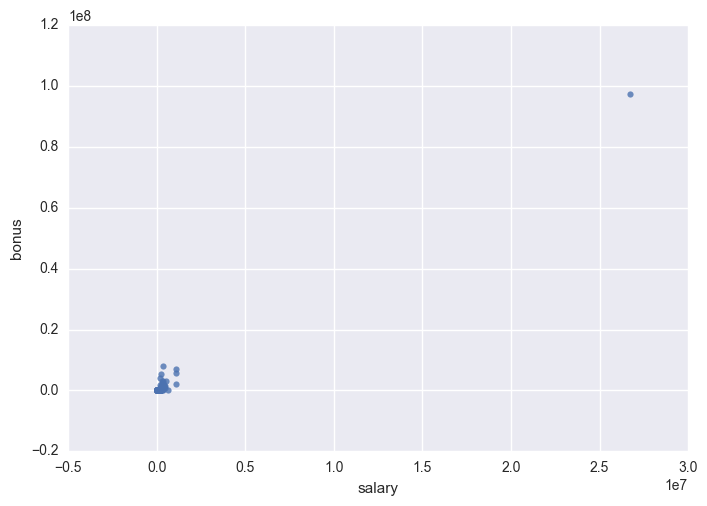

In [15]:
ax = sns.regplot(x='salary', y='bonus', data=data, fit_reg=False)

In [16]:
data.sort_values('salary', ascending=False).head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
TOTAL,26704229.0,0.0,32083396.0,309886585.0,311764000.0,97343619.0,130322299.0,0.0,-7576788.0,434509511.0,5235198.0,83925000.0,0.0,42667589.0,0.0,False,1398517.0,-27992891.0,48521928.0,0.0
SKILLING JEFFREY K,1111258.0,3627.0,0.0,8682716.0,19250000.0,5600000.0,6843672.0,2042.0,0.0,26093672.0,29336.0,0.0,108.0,22122.0,30.0,True,0.0,0.0,1920000.0,88.0
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,34348384.0,7000000.0,14761694.0,2411.0,0.0,49110078.0,99832.0,81525000.0,36.0,10359729.0,16.0,True,0.0,-300000.0,3600000.0,123.0
FREVERT MARK A,1060932.0,3275.0,6426990.0,17252530.0,10433518.0,2000000.0,4188667.0,2979.0,0.0,14622185.0,86987.0,2000000.0,21.0,7427621.0,6.0,False,0.0,-3367011.0,1617011.0,242.0
PICKERING MARK R,655037.0,898.0,0.0,1386690.0,28798.0,300000.0,0.0,728.0,0.0,28798.0,31653.0,400000.0,67.0,0.0,0.0,False,0.0,0.0,0.0,7.0


In [17]:
data = data.drop(['TOTAL'])

In [18]:
# By reading the provided pdf, drop two more rows
data = data.drop(['THE TRAVEL AGENCY IN THE PARK', 'LOCKHART EUGENE E'])
data.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,13868.0,0.0,2195.0,152.0,65.0,False,0.0,-3081055.0,304805.0,47.0
BADUM JAMES P,0.0,0.0,178980.0,182466.0,257817.0,0.0,0.0,0.0,0.0,257817.0,3486.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0
BANNANTINE JAMES M,477.0,566.0,0.0,916197.0,4046157.0,0.0,1757552.0,465.0,-560222.0,5243487.0,56301.0,0.0,29.0,864523.0,0.0,False,0.0,-5104.0,0.0,39.0
BAXTER JOHN C,267102.0,0.0,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,0.0,0.0,10623258.0,11200.0,0.0,0.0,2660303.0,0.0,False,0.0,-1386055.0,1586055.0,0.0
BAY FRANKLIN R,239671.0,0.0,260455.0,827696.0,0.0,400000.0,145796.0,0.0,-82782.0,63014.0,129142.0,0.0,0.0,69.0,0.0,False,0.0,-201641.0,0.0,0.0


In [20]:
# Add new features
data['poi_to_this_person_ratio'] = np.where(data['to_messages'] > 0, data['from_poi_to_this_person']/data['to_messages'], data['to_messages'])
data['this_person_to_poi_ratio'] = np.where(data['from_messages'] > 0, data['from_this_person_to_poi']/data['from_messages'], data['from_messages'])

In [21]:
# From dataframe to dict
data_dict = data.to_dict(orient='index')

In [22]:
features_list = ['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances',
                 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value',
                 'expenses', 'exercised_stock_options', 'long_term_incentive',
                 'restricted_stock', 'director_fees', 'to_messages', 'from_poi_to_this_person',
                 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi', 'other',
                 'poi_to_this_person_ratio', 'this_person_to_poi_ratio']

### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

The following sections contain the details of our analysis. We tried and tuned params for different classifiers.

In [126]:
sss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=42)

# 1. Logistic_Regression
# Use SelectKBest to select features
kbest = SelectKBest()
scaler = MinMaxScaler()

classifier = LogisticRegression()

pipeline = Pipeline(steps=[('minmax_scaler', scaler), ('feature_selection', kbest), ('logistic_reg', classifier)])

parameters = dict(logistic_reg__class_weight=['balanced'],
                          logistic_reg__solver=['liblinear'],
                          logistic_reg__C=range(1, 5),
                          logistic_reg__random_state=[42],
                          feature_selection__k=range(5,12))

cv_lg = GridSearchCV(pipeline, param_grid=parameters, scoring='f1', cv=sss)
cv_lg.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=100, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('minmax_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feature_selection', SelectKBest(k=10, score_func=<function f_classif at 0x114fcd9b0>)), ('logistic_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'logistic_reg__solver': ['liblinear'], 'logistic_reg__random_state': [42], 'feature_selection__k': [5, 6, 7, 8, 9, 10, 11], 'logistic_reg__class_weight': ['balanced'], 'logistic_reg__C': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [127]:
cv_lg.best_params_

{'feature_selection__k': 6,
 'logistic_reg__C': 1,
 'logistic_reg__class_weight': 'balanced',
 'logistic_reg__random_state': 42,
 'logistic_reg__solver': 'liblinear'}

In [128]:
test_classifier(cv_lg.best_estimator_, my_dataset, features_list)

Pipeline(steps=[('minmax_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feature_selection', SelectKBest(k=6, score_func=<function f_classif at 0x114fcd9b0>)), ('logistic_reg', LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])
	Accuracy: 0.76747	Precision: 0.30234	Recall: 0.56900	F1: 0.39486	F2: 0.48368
	Total predictions: 15000	True positives: 1138	False positives: 2626	False negatives:  862	True negatives: 10374



In [182]:
# ---------------------------------------------------
# 2. Decision Trees
# SelectKBest
classifier = DecisionTreeClassifier()

pipeline = Pipeline(steps=[('minmax_scaler', scaler), ('feature_selection', kbest), ('decision_tree', classifier)])

# parameters = dict(decision_tree__min_samples_leaf=range(1, 5),
#                           decision_tree__max_depth=range(1, 10),
#                           decision_tree__class_weight=['balanced'],
#                           decision_tree__criterion=['gini', 'entropy'],
#                           decision_tree__random_state=[42],
#                           feature_selection__k=range(8,12))

parameters = dict(decision_tree__min_samples_leaf=[4],
                          decision_tree__max_depth=[2],
                          decision_tree__class_weight=['balanced'],
                          decision_tree__criterion=['gini'],
                          decision_tree__random_state=[42],
                          feature_selection__k=[16])

cv_dt = GridSearchCV(pipeline, param_grid=parameters, scoring='f1', cv=sss)
cv_dt.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=100, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('minmax_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feature_selection', SelectKBest(k=10, score_func=<function f_classif at 0x114fcd9b0>)), ('decision_tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features...t=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'decision_tree__max_depth': [2], 'decision_tree__random_state': [42], 'decision_tree__criterion': ['gini'], 'feature_selection__k': [16], 'decision_tree__class_weight': ['balanced'], 'decision_tree__min_samples_leaf': [4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [183]:
cv_dt.best_params_

{'decision_tree__class_weight': 'balanced',
 'decision_tree__criterion': 'gini',
 'decision_tree__max_depth': 2,
 'decision_tree__min_samples_leaf': 4,
 'decision_tree__random_state': 42,
 'feature_selection__k': 16}

In [184]:
test_classifier(cv_dt.best_estimator_, my_dataset, features_list)

Pipeline(steps=[('minmax_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feature_selection', SelectKBest(k=16, score_func=<function f_classif at 0x114fcd9b0>)), ('decision_tree', DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'))])
	Accuracy: 0.78260	Precision: 0.34194	Recall: 0.68200	F1: 0.45550	F2: 0.56885
	Total predictions: 15000	True positives: 1364	False positives: 2625	False negatives:  636	True negatives: 10375



In [186]:
feature_indices = cv_dt.best_estimator_.named_steps["feature_selection"].get_support(indices=True)
feature_scores = cv_dt.best_estimator_.named_steps["feature_selection"].scores_
#print feature_indices
final_features_list = [features_list[i + 1] for i in feature_indices]
print final_features_list
for index in feature_indices:
    print '%s score: %f' % (features_list[index + 1], feature_scores[index])

['salary', 'total_payments', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'long_term_incentive', 'restricted_stock', 'director_fees', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi', 'poi_to_this_person_ratio', 'this_person_to_poi_ratio']
salary score: 11.196268
total_payments score: 2.767899
bonus score: 11.129479
restricted_stock_deferred score: 0.763457
deferred_income score: 5.304059
total_stock_value score: 14.691309
expenses score: 5.906223
exercised_stock_options score: 13.714021
long_term_incentive score: 2.611274
restricted_stock score: 6.576949
director_fees score: 1.796428
from_poi_to_this_person score: 3.590680
from_this_person_to_poi score: 2.143841
shared_receipt_with_poi score: 5.495321
poi_to_this_person_ratio score: 2.349338
this_person_to_poi_ratio score: 8.243016


In [142]:
# Decision Tree
# Feature scaling
# standardscaler
from sklearn.preprocessing import StandardScaler
stand_scaler = StandardScaler()

pipeline = Pipeline(steps=[('minmax_scaler', stand_scaler), ('feature_selection', kbest), ('decision_tree', classifier)])

# parameters = dict(decision_tree__min_samples_leaf=range(1, 5),
#                           decision_tree__max_depth=range(1, 10),
#                           decision_tree__class_weight=['balanced'],
#                           decision_tree__criterion=['gini', 'entropy'],
#                           decision_tree__random_state=[42],
#                           feature_selection__k=range(8,12))

parameters = dict(decision_tree__min_samples_leaf=range(1, 5),
                          decision_tree__max_depth=range(1, 3),
                          decision_tree__class_weight=['balanced'],
                          decision_tree__criterion=['gini'],
                          decision_tree__random_state=[42],
                          feature_selection__k=range(17, 20))

cv_dt = GridSearchCV(pipeline, param_grid=parameters, scoring='f1', cv=sss)
cv_dt.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=100, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('minmax_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('feature_selection', SelectKBest(k=10, score_func=<function f_classif at 0x114fcd9b0>)), ('decision_tree', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'decision_tree__max_depth': [1, 2], 'decision_tree__random_state': [42], 'decision_tree__criterion': ['gini'], 'feature_selection__k': [17, 18, 19], 'decision_tree__class_weight': ['balanced'], 'decision_tree__min_samples_leaf': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [143]:
cv_dt.best_params_

{'decision_tree__class_weight': 'balanced',
 'decision_tree__criterion': 'gini',
 'decision_tree__max_depth': 1,
 'decision_tree__min_samples_leaf': 4,
 'decision_tree__random_state': 42,
 'feature_selection__k': 17}

In [144]:
test_classifier(cv_dt.best_estimator_, my_dataset, features_list)

Pipeline(steps=[('minmax_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('feature_selection', SelectKBest(k=17, score_func=<function f_classif at 0x114fcd9b0>)), ('decision_tree', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=1, m...stimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])
	Accuracy: 0.79480	Precision: 0.34670	Recall: 0.60950	F1: 0.44199	F2: 0.52926
	Total predictions: 15000	True positives: 1219	False positives: 2297	False negatives:  781	True negatives: 10703



In [145]:
# Decision Tree
# Feature scaling
# No scaling
pipeline = Pipeline(steps=[('feature_selection', kbest), ('decision_tree', classifier)])

# parameters = dict(decision_tree__min_samples_leaf=range(1, 5),
#                           decision_tree__max_depth=range(1, 10),
#                           decision_tree__class_weight=['balanced'],
#                           decision_tree__criterion=['gini', 'entropy'],
#                           decision_tree__random_state=[42],
#                           feature_selection__k=range(8,12))

parameters = dict(decision_tree__min_samples_leaf=range(1, 5),
                          decision_tree__max_depth=range(1, 3),
                          decision_tree__class_weight=['balanced'],
                          decision_tree__criterion=['gini'],
                          decision_tree__random_state=[42],
                          feature_selection__k=range(16, 18))

cv_dt = GridSearchCV(pipeline, param_grid=parameters, scoring='f1', cv=sss)
cv_dt.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=100, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('feature_selection', SelectKBest(k=10, score_func=<function f_classif at 0x114fcd9b0>)), ('decision_tree', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impu...mators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'decision_tree__max_depth': [1, 2], 'decision_tree__random_state': [42], 'decision_tree__criterion': ['gini'], 'feature_selection__k': [17, 18, 19], 'decision_tree__class_weight': ['balanced'], 'decision_tree__min_samples_leaf': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [146]:
cv_dt.best_params_

{'decision_tree__class_weight': 'balanced',
 'decision_tree__criterion': 'gini',
 'decision_tree__max_depth': 1,
 'decision_tree__min_samples_leaf': 4,
 'decision_tree__random_state': 42,
 'feature_selection__k': 17}

In [147]:
test_classifier(cv_dt.best_estimator_, my_dataset, features_list)

Pipeline(steps=[('feature_selection', SelectKBest(k=17, score_func=<function f_classif at 0x114fcd9b0>)), ('decision_tree', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=1, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])
	Accuracy: 0.79487	Precision: 0.34680	Recall: 0.60950	F1: 0.44207	F2: 0.52931
	Total predictions: 15000	True positives: 1219	False positives: 2296	False negatives:  781	True negatives: 10704



In [155]:
# PCA
pipeline = Pipeline(steps=[('minmax_scaler', scaler), ('feature_selection', pca), ('decision_tree', classifier)])

parameters = dict(decision_tree__min_samples_leaf=range(1, 5),
                          decision_tree__max_depth=range(1, 5),
                          decision_tree__class_weight=['balanced'],
                          decision_tree__criterion=['gini', 'entropy'],
                          decision_tree__random_state=[42],
                          feature_selection__random_state=[42],
                          feature_selection__n_components=[2, 3])

cv = GridSearchCV(pipeline, param_grid=parameters, scoring='f1', cv=sss)
cv.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=100, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('minmax_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feature_selection', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('decision_tree', RandomForestClassifier(bootstrap=True, class_weight=None, criteri...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'decision_tree__max_depth': [1, 2, 3, 4], 'decision_tree__random_state': [42], 'feature_selection__n_components': [2, 3], 'feature_selection__random_state': [42], 'decision_tree__criterion': ['gini', 'entropy'], 'decision_tree__class_weight': ['balanced'], 'decision_tree__min_samples_leaf': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_

In [156]:
cv_dt_pca = cv
cv_dt_pca.best_params_

{'decision_tree__class_weight': 'balanced',
 'decision_tree__criterion': 'gini',
 'decision_tree__max_depth': 2,
 'decision_tree__min_samples_leaf': 4,
 'decision_tree__random_state': 42,
 'feature_selection__n_components': 2,
 'feature_selection__random_state': 42}

In [157]:
test_classifier(cv_dt_pca.best_estimator_, my_dataset, features_list)

Pipeline(steps=[('minmax_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feature_selection', PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('decision_tree', RandomForestClassifier(bootstrap=True, class_weight='balanced',
      ...stimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])
	Accuracy: 0.72627	Precision: 0.28957	Recall: 0.72450	F1: 0.41376	F2: 0.55714
	Total predictions: 15000	True positives: 1449	False positives: 3555	False negatives:  551	True negatives: 9445



In [86]:
#---------------------------------------------------
# 3. SVC
# SelectKBest
from sklearn.svm import SVC
classifier = SVC()

pipeline = Pipeline(steps=[('minmax_scaler', scaler), ('feature_selection', kbest), ('svc', classifier)])

# parameters = dict(svc__C=np.logspace(-3, 2, 6, base=2),
#                  svc__kernel=['linear', 'poly', 'rbf', 'sigmoid'],
#                  svc__gamma=np.logspace(-3, 2, 6, base=2),
#                  svc__class_weight=['balanced'],
#                  svc__random_state=[42],
#                  feature_selection__k=range(5,10))

parameters = dict(svc__C=np.logspace(-3, 2, 6),
                 svc__kernel=['rbf'],
                 svc__gamma=np.logspace(-3, 2, 6),
                 svc__class_weight=['balanced'],
                 svc__random_state=[42],
                 feature_selection__k=[7])

cv_svc = GridSearchCV(pipeline, param_grid=parameters, scoring='f1', cv=sss)
cv_svc.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=100, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('minmax_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feature_selection', SelectKBest(k=10, score_func=<function f_classif at 0x114fcd9b0>)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'svc__gamma': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'svc__class_weight': ['balanced'], 'svc__C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'feature_selection__k': [7], 'svc__kernel': ['rbf'], 'svc__random_state': [42]},
       pre_dispatch

In [87]:
cv_svc.best_params_

{'feature_selection__k': 7,
 'svc__C': 0.10000000000000001,
 'svc__class_weight': 'balanced',
 'svc__gamma': 10.0,
 'svc__kernel': 'rbf',
 'svc__random_state': 42}

In [88]:
test_classifier(cv_svc.best_estimator_, my_dataset, features_list)

Pipeline(steps=[('minmax_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feature_selection', SelectKBest(k=7, score_func=<function f_classif at 0x114fcd9b0>)), ('svc', SVC(C=0.10000000000000001, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))])
	Accuracy: 0.67040	Precision: 0.27157	Recall: 0.87500	F1: 0.41450	F2: 0.60579
	Total predictions: 15000	True positives: 1750	False positives: 4694	False negatives:  250	True negatives: 8306



In [107]:
# 4. Adaboost
# SelectKBest

DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier(base_estimator = DTC)

pipeline = Pipeline(steps=[('minmax_scaler', scaler), ('feature_selection', kbest), ('adaboost', ABC)])

# parameters = dict(adaboost__random_state=[42],
#                   adaboost__base_estimator__min_samples_leaf=range(1, 5),
#                   adaboost__base_estimator__max_depth=range(1, 10),
#                   adaboost__base_estimator__class_weight=['balanced'],
#                   adaboost__base_estimator__criterion=['gini', 'entropy'],
#                   feature_selection__k=range(5, 10))
parameters = dict(adaboost__random_state=[42],
                  adaboost__base_estimator__min_samples_leaf=[1],
                  adaboost__base_estimator__max_depth=range(12, 14),
                  adaboost__base_estimator__class_weight=['balanced'],
                  adaboost__base_estimator__criterion=['gini'],
                  adaboost__base_estimator__random_state=[42],
                  feature_selection__k=range(20, 22))

cv_ab = GridSearchCV(pipeline, param_grid=parameters, scoring='f1', cv=sss)
cv_ab.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=100, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('minmax_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feature_selection', SelectKBest(k=10, score_func=<function f_classif at 0x114fcd9b0>)), ('adaboost', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini',...dom_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'adaboost__base_estimator__random_state': [42], 'adaboost__base_estimator__class_weight': ['balanced'], 'adaboost__base_estimator__max_depth': [12, 13], 'adaboost__base_estimator__criterion': ['gini'], 'feature_selection__k': [20, 21], 'adaboost__base_estimator__min_samples_leaf': [1], 'adaboost__random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, 

In [108]:
cv_ab.best_params_

{'adaboost__base_estimator__class_weight': 'balanced',
 'adaboost__base_estimator__criterion': 'gini',
 'adaboost__base_estimator__max_depth': 12,
 'adaboost__base_estimator__min_samples_leaf': 1,
 'adaboost__base_estimator__random_state': 42,
 'adaboost__random_state': 42,
 'feature_selection__k': 20}

In [109]:
test_classifier(cv_ab.best_estimator_, my_dataset, features_list)

Pipeline(steps=[('minmax_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feature_selection', SelectKBest(k=20, score_func=<function f_classif at 0x114fcd9b0>)), ('adaboost', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='... random_state=42, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=42))])
	Accuracy: 0.84113	Precision: 0.40382	Recall: 0.40200	F1: 0.40291	F2: 0.40236
	Total predictions: 15000	True positives:  804	False positives: 1187	False negatives: 1196	True negatives: 11813



In [164]:
# standard scaling
pipeline = Pipeline(steps=[('minmax_scaler', stand_scaler), ('feature_selection', kbest), ('adaboost', ABC)])

# parameters = dict(adaboost__random_state=[42],
#                   adaboost__base_estimator__min_samples_leaf=range(1, 5),
#                   adaboost__base_estimator__max_depth=range(1, 10),
#                   adaboost__base_estimator__class_weight=['balanced'],
#                   adaboost__base_estimator__criterion=['gini', 'entropy'],
#                   feature_selection__k=range(5, 10))
parameters = dict(adaboost__random_state=[42],
                  adaboost__base_estimator__min_samples_leaf=[1],
                  adaboost__base_estimator__max_depth=range(8, 10),
                  adaboost__base_estimator__class_weight=['balanced'],
                  adaboost__base_estimator__criterion=['gini'],
                  adaboost__base_estimator__random_state=[42],
                  feature_selection__k=[19])

cv_ab_sd = GridSearchCV(pipeline, param_grid=parameters, scoring='f1', cv=sss)
cv_ab_sd.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=100, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('minmax_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('feature_selection', SelectKBest(k=10, score_func=<function f_classif at 0x114fcd9b0>)), ('adaboost', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criter...dom_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'adaboost__base_estimator__random_state': [42], 'adaboost__base_estimator__class_weight': ['balanced'], 'adaboost__base_estimator__max_depth': [8, 9], 'adaboost__base_estimator__criterion': ['gini'], 'feature_selection__k': [19], 'adaboost__base_estimator__min_samples_leaf': [1], 'adaboost__random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, return

In [165]:
cv_ab_sd.best_params_

{'adaboost__base_estimator__class_weight': 'balanced',
 'adaboost__base_estimator__criterion': 'gini',
 'adaboost__base_estimator__max_depth': 9,
 'adaboost__base_estimator__min_samples_leaf': 1,
 'adaboost__base_estimator__random_state': 42,
 'adaboost__random_state': 42,
 'feature_selection__k': 19}

In [166]:
test_classifier(cv_ab_sd.best_estimator_, my_dataset, features_list)

Pipeline(steps=[('minmax_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('feature_selection', SelectKBest(k=19, score_func=<function f_classif at 0x114fcd9b0>)), ('adaboost', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', ... random_state=42, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=42))])
	Accuracy: 0.83973	Precision: 0.36763	Recall: 0.28050	F1: 0.31821	F2: 0.29446
	Total predictions: 15000	True positives:  561	False positives:  965	False negatives: 1439	True negatives: 12035



In [169]:
# no scaling
pipeline = Pipeline(steps=[('feature_selection', kbest), ('adaboost', ABC)])

# parameters = dict(adaboost__random_state=[42],
#                   adaboost__base_estimator__min_samples_leaf=range(1, 5),
#                   adaboost__base_estimator__max_depth=range(1, 10),
#                   adaboost__base_estimator__class_weight=['balanced'],
#                   adaboost__base_estimator__criterion=['gini', 'entropy'],
#                   feature_selection__k=range(5, 10))
parameters = dict(adaboost__random_state=[42],
                  adaboost__base_estimator__min_samples_leaf=range(1, 5),
                  adaboost__base_estimator__max_depth=[1, 3, 5, 7, 9],
                  adaboost__base_estimator__class_weight=['balanced'],
                  adaboost__base_estimator__criterion=['gini', 'entropy'],
                  adaboost__base_estimator__random_state=[42],
                  feature_selection__k=[20])

cv_ab_no = GridSearchCV(pipeline, param_grid=parameters, scoring='f1', cv=sss)
cv_ab_no.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('feature_selection', SelectKBest(k=10, score_func=<function f_classif at 0x114fcd9b0>)), ('adaboost', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=Non...dom_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'adaboost__base_estimator__random_state': [42], 'adaboost__base_estimator__class_weight': ['balanced'], 'adaboost__base_estimator__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'adaboost__base_estimator__criterion': ['gini', 'entropy'], 'feature_selection__k': [18, 19, 20], 'adaboost__base_estimator__min_samples_leaf': [1, 2, 3, 4], 'adaboost__random_state': [42]},
  

In [172]:
cv_ab_no.best_params_

{'adaboost__base_estimator__class_weight': 'balanced',
 'adaboost__base_estimator__criterion': 'entropy',
 'adaboost__base_estimator__max_depth': 1,
 'adaboost__base_estimator__min_samples_leaf': 3,
 'adaboost__base_estimator__random_state': 42,
 'adaboost__random_state': 42,
 'feature_selection__k': 20}

In [171]:
test_classifier(cv_ab_no.best_estimator_, my_dataset, features_list)

Pipeline(steps=[('feature_selection', SelectKBest(k=20, score_func=<function f_classif at 0x114fcd9b0>)), ('adaboost', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=1, max_features=None, max_leaf_nod... random_state=42, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=42))])
	Accuracy: 0.83627	Precision: 0.37676	Recall: 0.34850	F1: 0.36208	F2: 0.35381
	Total predictions: 15000	True positives:  697	False positives: 1153	False negatives: 1303	True negatives: 11847



In [179]:
# PCA
pipeline = Pipeline(steps=[('minmax_scaler', scaler), ('feature_selection', pca), ('adaboost', ABC)])

# parameters = dict(adaboost__random_state=[42],
#                   adaboost__base_estimator__min_samples_leaf=range(3, 6),
#                   adaboost__base_estimator__max_depth=range(1, 10),
#                   adaboost__base_estimator__class_weight=['balanced'],
#                   adaboost__base_estimator__criterion=['gini', 'entropy'],
#                   feature_selection__n_components=range(4,7))

# parameters = dict(adaboost__random_state=[42],
#                   adaboost__base_estimator__min_samples_leaf=[4],
#                   adaboost__base_estimator__max_depth=[1],
#                   adaboost__base_estimator__class_weight=['balanced'],
#                   adaboost__base_estimator__criterion=['entropy'],
#                   feature_selection__n_components=[5])

parameters = dict(adaboost__random_state=[42],
                  adaboost__base_estimator__min_samples_leaf=range(3, 6),
                  adaboost__base_estimator__max_depth=range(1, 10),
                  adaboost__base_estimator__class_weight=['balanced'],
                  adaboost__base_estimator__criterion=['entropy'],
                  feature_selection__n_components=range(4,7))

cv_ab_pca = GridSearchCV(pipeline, param_grid=parameters, scoring='f1', cv=sss)
cv_ab_pca.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=100, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('minmax_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feature_selection', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('adaboost', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=Decis...dom_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'adaboost__base_estimator__class_weight': ['balanced'], 'feature_selection__n_components': [4, 5, 6], 'adaboost__base_estimator__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'adaboost__base_estimator__criterion': ['entropy'], 'adaboost__base_estimator__min_samples_leaf': [3, 4, 5], 'adaboost__random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, return_t

In [180]:
cv_ab_pca.best_params_

{'adaboost__base_estimator__class_weight': 'balanced',
 'adaboost__base_estimator__criterion': 'entropy',
 'adaboost__base_estimator__max_depth': 1,
 'adaboost__base_estimator__min_samples_leaf': 4,
 'adaboost__random_state': 42,
 'feature_selection__n_components': 4}

In [181]:
test_classifier(cv_ab_pca.best_estimator_, my_dataset, features_list)

Pipeline(steps=[('minmax_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feature_selection', PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('adaboost', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=Decision...andom_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=42))])
	Accuracy: 0.79433	Precision: 0.21760	Recall: 0.20900	F1: 0.21321	F2: 0.21066
	Total predictions: 15000	True positives:  418	False positives: 1503	False negatives: 1582	True negatives: 11497



In [132]:
# ------------------------------------
# 5. Randomforest
# SelectKBest
classifier = RandomForestClassifier()

pipeline = Pipeline(steps=[('minmax_scaler', scaler), ('feature_selection', kbest), ('random_forest', classifier)])

# parameters = dict(random_forest__n_estimators=[25, 50],
#                  random_forest__min_samples_split=[2, 3, 4],
#                  random_forest__criterion=['gini', 'entropy'],
#                  feature_selection__k=range(5,10))

parameters = dict(random_forest__n_estimators=[15],
                 random_forest__min_samples_split=[2, 4],
                 random_forest__criterion=['entropy'],
                 feature_selection__k=[10])

cv_rf = GridSearchCV(pipeline, param_grid=parameters, scoring='f1', cv=sss)
cv_rf.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=100, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('minmax_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feature_selection', SelectKBest(k=10, score_func=<function f_classif at 0x114fcd9b0>)), ('random_forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='a...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'random_forest__criterion': ['entropy'], 'random_forest__n_estimators': [15], 'feature_selection__k': [10], 'random_forest__min_samples_split': [2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [133]:
cv_rf.best_params_

{'feature_selection__k': 10,
 'random_forest__criterion': 'entropy',
 'random_forest__min_samples_split': 2,
 'random_forest__n_estimators': 15}

In [134]:
test_classifier(cv_rf.best_estimator_, my_dataset, features_list)

Pipeline(steps=[('minmax_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feature_selection', SelectKBest(k=10, score_func=<function f_classif at 0x114fcd9b0>)), ('random_forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features...imators=15, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])
	Accuracy: 0.85900	Precision: 0.42927	Recall: 0.17450	F1: 0.24813	F2: 0.19800
	Total predictions: 15000	True positives:  349	False positives:  464	False negatives: 1651	True negatives: 12536



In [89]:
#-----------------------------------------------------
# 6. Naive Bayes
# SelectKBest
classifier = GaussianNB()

pipeline = Pipeline(steps=[('minmax_scaler', scaler), ('feature_selection', kbest), ('naive_bayes', classifier)])

parameters = dict(feature_selection__k=range(5,10))

cv_nb = GridSearchCV(pipeline, param_grid=parameters, scoring='f1', cv=sss)
cv_nb.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=100, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('minmax_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feature_selection', SelectKBest(k=10, score_func=<function f_classif at 0x114fcd9b0>)), ('naive_bayes', GaussianNB(priors=None))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'feature_selection__k': [5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [90]:
cv_nb.best_params_

{'feature_selection__k': 6}

In [91]:
test_classifier(cv_nb.best_estimator_, my_dataset, features_list)

Pipeline(steps=[('minmax_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('feature_selection', SelectKBest(k=6, score_func=<function f_classif at 0x114fcd9b0>)), ('naive_bayes', GaussianNB(priors=None))])
	Accuracy: 0.83920	Precision: 0.37753	Recall: 0.31750	F1: 0.34492	F2: 0.32793
	Total predictions: 15000	True positives:  635	False positives: 1047	False negatives: 1365	True negatives: 11953

